In [6]:
%cd ..

/home/pauline/Dokumente/Delab_Projekt/delab


In [7]:
import pandas as pd

In [44]:
from util.sql_switch import get_query_native

authors_tweets = get_query_native(
    "SELECT ta.id as author_id, conversation_id, screen_name , is_climate_author, climate_author_type FROM delab_tweet t, delab_tweetauthor ta WHERE t.author_id=ta.twitter_id")
clauthors_tweets = authors_tweets.loc[authors_tweets['is_climate_author']== True]
clauthors_tweets = clauthors_tweets.replace(['non-governmental organisation'], 'NGO')
clauthors_tweets = clauthors_tweets.groupby(["author_id", "screen_name", "climate_author_type","conversation_id"]).mean()

c_cam = get_query_native(
    "SELECT author_id, is_root_author, c.conversation_id, depth, branching_factor, root_dominance, centrality, baseline_vision, n_posts FROM delab_conversation c, delab_conversationauthormetrics cam WHERE c.conversation_id=cam.conversation_id")
c_cam = c_cam.groupby(["author_id", "conversation_id"]).mean()
c_cam.head()

analysis = clauthors_tweets.join(c_cam)
analysis.head()

using postgres
using postgres


/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/pauline/Dokumente/Delab_Projekt/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


is_climate_author  \
author_id conversation_id     screen_name climate_author_type                      
1         1575916410295009308 mnyomb1     activist                           1.0   
          1578084206940487680 mnyomb1     activist                           1.0   
          1582639690309828609 mnyomb1     activist                           1.0   
          1585616351493820416 mnyomb1     activist                           1.0   
          1597566310191624196 mnyomb1     activist                           1.0   

                                                               is_root_author  \
author_id conversation_id     screen_name climate_author_type                   
1         1575916410295009308 mnyomb1     activist                        1.0   
          1578084206940487680 mnyomb1     activist                        NaN   
          1582639690309828609 mnyomb1     activist                        NaN   
          1585616351493820416 mnyomb1     activist                        1.0   
          1597566310191624196 mnyomb1     activist                        NaN   

                                                               depth  \
author_id conversation_id     screen_name climate_author_type          
1         1575916410295009308 mnyomb1     activist               3.0   
          1578084206940487680 mnyomb1     activist               NaN   
          1582639690309828609 mnyomb1     activist               NaN   
          1585616351493820416 mnyomb1     activist               3.0   
          1597566310191624196 mnyomb1     activist               NaN   

                                                               branching_factor  \
author_id conversation_id     screen_name climate_author_type                     
1         1575916410295009308 mnyomb1     activist                          5.0   
          1578084206940487680 mnyomb1     activist                          NaN   
          1582639690309828609 mnyomb1     activist                          NaN   
          1585616351493820416 mnyomb1     activist                         21.0   
          1597566310191624196 mnyomb1     activist                          NaN   

                                                               root_dominance  \
author_id conversation_id     screen_name climate_author_type                   
1         1575916410295009308 mnyomb1     activist                   0.166667   
          1578084206940487680 mnyomb1     activist                        NaN   
          1582639690309828609 mnyomb1     activist                        NaN   
          1585616351493820416 mnyomb1     activist                   0.642857   
          1597566310191624196 mnyomb1     activist                        NaN   

                                                               centrality  \
author_id conversation_id     screen_name climate_author_type               
1         1575916410295009308 mnyomb1     activist               3.500000   
          1578084206940487680 mnyomb1     activist                    NaN   
          1582639690309828609 mnyomb1     activist                    NaN   
          1585616351493820416 mnyomb1     activist               1.444444   
          1597566310191624196 mnyomb1     activist                    NaN   

                                                               baseline_vision  \
author_id conversation_id     screen_name climate_author_type                    
1         1575916410295009308 mnyomb1     activist                    0.500000   
          1578084206940487680 mnyomb1     activist                         NaN   
          1582639690309828609 mnyomb1     activist                         NaN   
          1585616351493820416 mnyomb1     activist                    0.118056   
          1597566310191624196 mnyomb1     activist                         NaN   

                                                               n_posts  
author_id conversation_id     screen_name climate_author_type  

## Analyse
- Nach climate_author_type analysieren
- Fragen:
    - in wievielen Konversationen sind die Autoren durchschnittlich vertreten?
    - welche Zentralität haben die AUtoren durchschnittlich?
    - welche root dominance haben die Autoren durchschnittlich?
    - welchen branching_factor und welche depth haben die Konversationen, in denen die Autoren root auhtor sind duchschnittlich?
    

In [45]:
climate_analysis = analysis.groupby(['climate_author_type']).mean()
climate_analysis = climate_analysis.drop('journalist') #bisher sind alle ergebnisse für journalists NaN, deswegen werden wir sie nicht betrachten
climate_analysis

,is_climate_author,is_root_author,depth,branching_factor,root_dominance,centrality,baseline_vision,n_posts
climate_author_type,,,,,,,,
NGO,1.0,0.954545,4.136364,19.409091,10.636062,12.521334,0.455492,1.272727
activist,1.0,1.000000,4.777778,15.111111,13.089947,4.428219,0.318047,3.333333
organisation,1.0,1.000000,2.518519,16.333333,14.376401,14.481481,0.467593,1.185185
politician,1.0,1.000000,5.000000,22.000000,23.000000,6.916667,0.247437,2.666667
scientist,1.0,0.933333,4.333333,25.800000,25.097857,11.590370,0.366982,1.933333


In [40]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'depth')

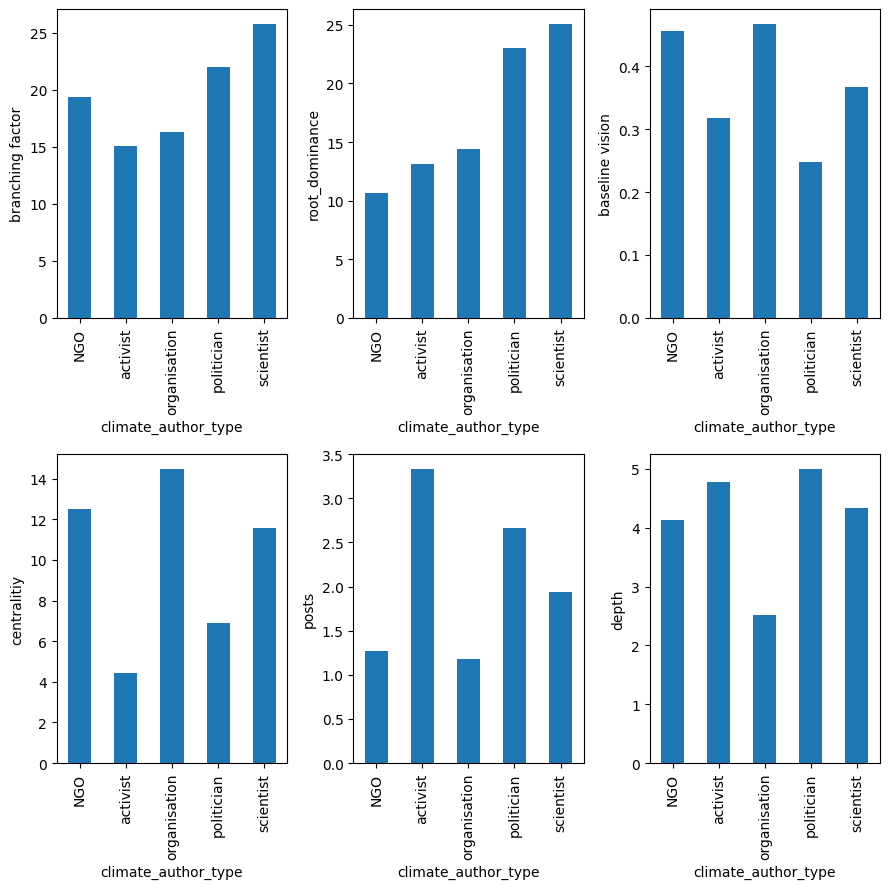

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(9,9))

ax1 = climate_analysis['branching_factor'].plot.bar(ax=axes[0,0])
ax1.set_ylabel("branching factor")

ax2 = climate_analysis['root_dominance'].plot.bar(ax=axes[0,1])
ax2.set_ylabel("root_dominance")

ax3 = climate_analysis['centrality'].plot.bar(ax=axes[1,0])
ax3.set_ylabel("centralitiy")

ax4 = climate_analysis['n_posts'].plot.bar(ax=axes[1,1])
ax4.set_ylabel("posts");

ax5 = climate_analysis['baseline_vision'].plot.bar(ax=axes[0,2])
ax5.set_ylabel("baseline vision")

ax6 = climate_analysis['depth'].plot.bar(ax=axes[1,2])
ax6.set_ylabel("depth")